In [18]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from datetime import datetime

import pandas as pd
import numpy as np

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False


In [19]:
df = pd.read_csv("india-inflation-rate-cpi.csv", parse_dates=["date"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 60 non-null     datetime64[ns]
 1    Inflation Rate (%)  60 non-null     float64       
 2    Annual Change       59 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.5 KB


In [21]:
df = df.rename(columns={" Inflation Rate (%)":"inflation_rate", " Annual Change":"annual_change"})

In [22]:
df.head()

,date,inflation_rate,annual_change
0,1960-12-31,1.7799,NaN
1,1961-12-31,1.6952,-0.08
2,1962-12-31,3.6322,1.94
3,1963-12-31,2.9462,-0.69
4,1964-12-31,13.3553,10.41


In [23]:
print('Rows ', df.shape[0])
print('Columns ', df.shape[1])
print('Features ', df.columns.tolist())
print('\nMissing values \n', df.isnull().any())
print('\nUnique Values \n', df.nunique())

Rows  60
Columns  3
Features  ['date', 'inflation_rate', 'annual_change']

Missing values 
 date              False
inflation_rate    False
annual_change      True
dtype: bool

Unique Values 
 date              60
inflation_rate    60
annual_change     58
dtype: int64


In [24]:
df_non_indexed = df.copy()
df = df.set_index('date')

In [26]:
import plotly.express as px
fig = px.line(df_non_indexed, x='date', y='inflation_rate', title='Inflation')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [27]:
fig = px.line(df_non_indexed, x='date', y='inflation_rate', title='Inflation')

fig.update_xaxes(rangeslider_visible=True, 
                 rangeselector=dict(
                     buttons=list([
                                  dict(count=1, label='1y', step='year', stepmode='backward'),
                                  dict(count=2, label='2y', step='year', stepmode='backward'),
                                  dict(count=3, label='3y', step='year', stepmode='backward'),
                                  dict(step='all')
                     ])
                     )
                 )
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



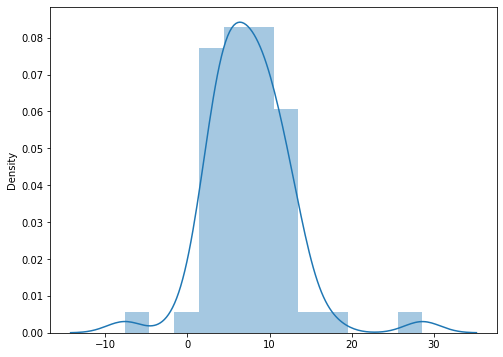

In [34]:
sns.distplot(df[['inflation_rate']], hist=True)